<a href="https://colab.research.google.com/github/Luis-Amagua/Curso_intro_redes_neuronales/blob/main/4Red_Neuronal_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creando una red neuronal usando numpy

In [39]:
import numpy as np
# se cambia a GPU en colab: Entorno de ejecucion// cambiar entorno de ejcucion// GPU
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles


In [40]:
N=1000 # ejemplos
gaussian_quantiles=make_gaussian_quantiles(mean=None, 
                        cov=0.1,
                        n_samples=N,
                        n_features=2, # caracteristicas
                        n_classes=2,
                        shuffle=True,
                        random_state=None)# circulos gausianos
X,Y =gaussian_quantiles

In [41]:
print(X.shape)
print(Y.shape) # es un vector

(1000, 2)
(1000,)


In [42]:
Y=Y[:,np.newaxis]

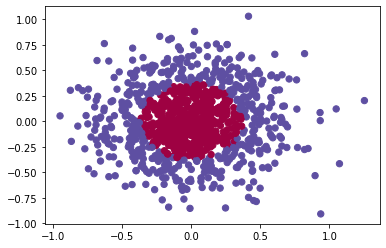

In [43]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

se necesita una red neuronal que sea capaz de dstingir que en el centro está una clase y a los bordos otra clase

In [44]:
# funciones de activacion

def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0 ] = 1
        return x
    else:    
        return np.maximum(0, x)

In [45]:
# funcion de perdida
def mse(y, y_hat, derivate = False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [46]:
# cada neurona tiene pesos y bias

def initialize_parameters_deep(layers_dim):
  parameters={}
  L=len(layers_dim)
  for l in range(0,L-1):
    parameters['W'+str(l+1)]=(np.random.rand(layers_dim[l], layers_dim[l+1])*2)-1
    parameters['b'+str(l+1)]=(np.random.rand(1, layers_dim[l+1])*2)-1
  return parameters



In [47]:
 np.random.rand(10,3) # tamaño matrix 10x3

array([[0.57670029, 0.07703496, 0.94932637],
       [0.62460511, 0.05833147, 0.77184117],
       [0.14887167, 0.73570962, 0.81011076],
       [0.02499306, 0.7436827 , 0.07208214],
       [0.57065414, 0.24781961, 0.64104957],
       [0.30846409, 0.09968523, 0.13479627],
       [0.37459616, 0.02879947, 0.41880529],
       [0.01391417, 0.08498984, 0.89464965],
       [0.1071042 , 0.00303113, 0.87217887],
       [0.41035918, 0.84506128, 0.31818288]])

In [48]:
layer_dim=[2,4,8,1]# numero de neuronas en cada capa y desemboca en una neurona, ie, numero de neuronas por cada capa


In [49]:
params=initialize_parameters_deep(layer_dim)
params

{'W1': array([[ 0.1772583 , -0.45140611,  0.36223452,  0.97185288],
        [ 0.56349909,  0.04494747,  0.08064492, -0.1483157 ]]),
 'b1': array([[-0.75578666,  0.70749807, -0.80288788, -0.65088936]]),
 'W2': array([[-0.9277306 , -0.5688231 ,  0.08488419,  0.77860337,  0.86000772,
          0.92097273,  0.84058355, -0.47347087],
        [-0.8661527 , -0.65418468, -0.28359652, -0.08277062, -0.90651027,
          0.55429848,  0.86387808, -0.01431813],
        [-0.0741979 ,  0.32525345, -0.88822869, -0.67936015, -0.38395612,
         -0.76732942, -0.76642775, -0.0543545 ],
        [-0.19591159, -0.28110931,  0.42052821, -0.86887203, -0.90528851,
         -0.62364235, -0.29570349, -0.10642915]]),
 'b2': array([[ 0.6834939 ,  0.57036185,  0.94402444,  0.60382942, -0.32447325,
          0.46306651,  0.89891226, -0.9745083 ]]),
 'W3': array([[-0.52462772],
        [ 0.51961232],
        [ 0.81941489],
        [-0.30098131],
        [ 0.89267679],
        [ 0.48592767],
        [ 0.61179635],


## __Entrenamiento forward de la red neuronal__

In [50]:
print(params['W1'])
params['W1'].shape

[[ 0.1772583  -0.45140611  0.36223452  0.97185288]
 [ 0.56349909  0.04494747  0.08064492 -0.1483157 ]]


(2, 4)

In [51]:
X.shape

(1000, 2)

In [52]:
#se puede hace rel producto entre los dos
np.matmul(X,params['W1']).shape # este resultado va a la siguiente red con 4 neuronas
X@params['W1'] # tambien es producto punto con "@"

array([[-0.07118764,  0.0021292 , -0.01583744,  0.00165592],
       [-0.43521407, -0.15037612,  0.02140651,  0.36759141],
       [ 0.08418469,  0.21506837, -0.13871549, -0.47798822],
       ...,
       [ 0.2202587 , -0.11266231,  0.12575694,  0.22694352],
       [-0.23681474,  0.10247537, -0.1217107 , -0.20318832],
       [-0.05904851, -0.04128741,  0.01801654,  0.09556502]])

In [59]:
params
params['A0']=X

params['Z1']=np.matmul(params['A0'],params['W1'])+params['b1']
# se añade una funcion de activacion
params['A1']=relu(params['Z1'])

params['Z2']=np.matmul(params['A1'],params['W2'])+params['b2']
params['A2']=relu(params['Z2'])

params['Z3']=np.matmul(params['A2'],params['W3'])+params['b3']
# la ultima capa tiene dos salidas y se asigna una prob, por eso se toma sigmoid
params['A3']=sigmoid(params['Z3'])



In [86]:
output=params['A3']

print(output.shape)
#print(output)

(1000, 1)


# Bakcpropagation

toma la última capa de la predicción, pasa por la funcion de perdida y propaga ese error para atrás

In [72]:
# se empiea por las deltas  de la última capa

params['dZ3']=mse(Y,output, True)*sigmoid(params['Z3'],True)
print(params['dZ3'].shape)
print(params['A2'].shape) # no se puede hacer el producto punto
print(params['A2'].T.shape) # aqui si s epued ehacer e product punto
params['dW3']=np.matmul(params['A2'].T,params['dZ3'])

(1000, 1)
(1000, 8)
(8, 1000)


In [75]:
params['dZ2']=np.matmul(params['dZ3'],params['W3'].T)*relu(params['A2'],True)
params['dW2']=np.matmul(params['A1'].T,params['dZ2'])

params['dZ1']=np.matmul(params['dZ2'],params['W2'].T)*relu(params['A1'],True)
params['dW1']=np.matmul(params['A0'].T,params['dZ1'])

In [80]:
# para propagar el error se hace el decenso del gradiente
# gradient descent

params['W3']=params['W3']-params['dW3']*0.001 # el ultimo valor es el Learning rate (LR)
params['b3']=params['b3']-(np.mean(params['dW3'],axis=0, keepdims=True))*0.001

params['W2']=params['W2']-params['dW2']*0.001 # el ultimo valor es el Learning rate (LR)
params['b2']=params['b2']-(np.mean(params['dW2'],axis=0, keepdims=True))*0.001

params['W1']=params['W1']-params['dW1']*0.001 # el ultimo valor es el Learning rate (LR)
params['b1']=params['b1']-(np.mean(params['dW1'],axis=0, keepdims=True))*0.001

Se puede crear una función para acoplar todo este proceso


In [85]:
# funcion unificada
# es una funcion de entranamiento de una red neuronal, haciendo forward, backprpagation y gradient descent(para actualizar los pesos)

def train(x_data, lr, params, training=True):
  # forward
  params['A0']=x_data

  params['Z1']=np.matmul(params['A0'],params['W1'])+params['b1']
  params['A1']=relu(params['Z1'])

  params['Z2']=np.matmul(params['A1'],params['W2'])+params['b2']
  params['A2']=relu(params['Z2'])

  params['Z3']=np.matmul(params['A2'],params['W3'])+params['b3']
  params['A3']=sigmoid(params['Z3'])
  output=params['A3']

  if training:
    
  # backpropagation
    params['dZ3']=mse(Y,output, True)*sigmoid(params['Z3'],True)
    params['dW3']=np.matmul(params['A2'].T,params['dZ3'])

    params['dZ2']=np.matmul(params['dZ3'],params['W3'].T)*relu(params['A2'],True)
    params['dW2']=np.matmul(params['A1'].T,params['dZ2'])

    params['dZ1']=np.matmul(params['dZ2'],params['W2'].T)*relu(params['A1'],True)
    params['dW1']=np.matmul(params['A0'].T,params['dZ1'])

  #gradient descent
    params['W3']=params['W3']-params['dW3']*lr # el ultimo valor es el Learning rate (LR)
    params['b3']=params['b3']-(np.mean(params['dW3'],axis=0, keepdims=True))*lr

    params['W2']=params['W2']-params['dW2']*lr # el ultimo valor es el Learning rate (LR)
    params['b2']=params['b2']-(np.mean(params['dW2'],axis=0, keepdims=True))*lr
    params['W1']=params['W1']-params['dW1']*lr # el ultimo valor es el Learning rate (LR)
    params['b1']=params['b1']-(np.mean(params['dW1'],axis=0, keepdims=True))*lr
  return output